## Introduction

This tutorial allows you to dive deeper into the applications of Principle Component Analysis or PCA specifically focusing on facial recognition. Facial recognition is one of the bigger applications of PCA in the industry. For instance, as you may know even iPhones use facial recognition so users can unlock their phone. Although in the computer vision field a combination of PCA, neural networks, etc. are used for facial recognition, we can achieve basic understanding of facial recognition through utilizing EigenFaces, which uses facial images to generate a set of features. In general EigenFaces is a dimension reduction technique which essentially means that we reduce the dimensions of feature space. As you will see, applying PCA to image data is a harder application of the algorithm but an important application as facial recognition is increasing in products. 



### Tutorial content

In this tutorial, we will show how to apply the PCA algorithm to image data in Python, specifically using [OpenCV](https://docs.opencv.org/master/), [numpy](https://numpy.org/doc/stable/), and [instaloader](https://instaloader.github.io/). Both OpenCV and numpy are used for PCA with EigenFaces and data preprocessing while instaloader is used for data collection. 

Rather than utilizing benchmarking data throughout this tutorial, we have also provided you with key skills to create your own image dataset, preprocess these images for PCA, and prep for modeling. Using instaloader you will be able to generate your own image dataset based on pulling instagram posts from specific instagram profiles.

We will cover the following topics in this tutorial:
- [What is PCA?](#What-is-PCA?)
- [Common Applications of PCA](#Common-Applications-of-PCA)
- [Installing the libraries](#Installing-the-libraries)
- [Loading and Understanding the Data](#Loading-and-Understanding-the-Data)
- [Data Preprocessing](#Spatial-joins)
- [Supermodel Data: Application of PCA Algorithm](#Coordinate-reference-systems)
- [Sample of Supermodel Data:Application of PCA Algorithm](#Example-application:-address2neighborhood)

##### NOTE: currently there are many bugs which I am trying to figure out and will be updated by Saturday night.

## What is PCA?
What if we want to reduce the number of dimensions of our dataset without losing too much information? Principal Component Analysis is a dimension-reduction technique that aimts to find the directions of maximum variance in our data. For ‘p’ dimensions, we want to find the ‘q’ directions in which we can describe most of our data. These ‘q’ directions, or principal components, are significantly less than the ‘p’ dimensions we have for our data, and each of these principal components are perpendicular to each other such that they are uncorrelated. The original ‘p’ features are linearly correlated but the components that are extracted are not. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process. There are 3 main steps involved in doing Principal Component Analysis: Standardize the continuous variables, compute the covariance matrix of the ‘p’ features, and compute the eigenvectors and eigenvalues of the covariance matrix to extract the principal components. 

The first step is to standardize the range of the continuous variables so that each of the values contributes fairly to the analysis. The image vector we have is in the fixed range from 0-256, which represent the color of the pixels, so we will not standardize these columns in the interest of retaining the image. In practice, it is critical to perform standardization prior to PCA. If there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges and that could bias our results. Thus, scaling our data can help prevent this problem. One form of standardizing our data can be as simple as subtracting the mean and dividing by the standard deviation for each value of each variable. 

But how can we start to observe if the variables have any relationship between them? In order to identify any strong relationships between variables, we can try to identify the correlations between these features so that we can see which variables are highly correlated. These variables contain redundant information, and we are able to find this by computing the covariance matrix. The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. 

The sign of the covariance between two variables matters. If the covariance is positive, then this implies there is a directly correlated relationship between the variables and that they increase or decrease together. Conversely, if the covariance is negative then one variable increases as the other variable decreases (inversely correlated).

There are special properties about this covariance matrix. For instance, this matrix is symmetric and non-negative definite, which means that the eigenvalues of this matrix are all real numbers. This symmetric property also means that if two eigenvectors are not equal to each other, then those two columns in this covariance matrix will be perpendicular. The leading eigenvector of the covariance matrix will be the first principal component, which is the direction in the subspace with maximum variance. This is the best 1-dimensional approximation of the data. 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is compressed into the first components. So, the idea is 20-dimensional data gives you 20 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on. These are the eigenvectors of the covariance matrix, in order of decreasing eigenvalue. Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables. 


## Installing the libraries
Before getting started, you'll need to install the various libraries that we will use. You can install opencv (cv2 depends on this) instaloader using pip:

OpenCV (for using cv2):
$ pip install opencv-python

Instaloader (for downloading instagram post images):
$ pip install instaloader

Run the following to import libraries.

In [ ]:
import instaloader
import sys
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
import random

## Loading and Understanding the Data
Let us say that we wanted to create a image data set for facial recognition by pulling from the Instagram API. Instaloader allows us you to do just that by pulling media content from various Instagram profiles or hashtags etc. In our case, we want to generate an image dataset of top super models across the world. The reason for choosing super models as our subjects for our image dataset is due to my assumption that supermodels tend to post more selfies or close up images of themselves which makes their instagram posts' ideal for our facial reconition image dataset. 

To begin with, we have found that Adriana Lima, Bella Hadid, Emily Ratajkowski, Gigi Hadid, Kendall Jenner, Liu Wen, and Rosie Hungtington are supermodels that were ranked the top ten highest paid supermodels in 2020. The goal is to generate an images directory with 200 images per model. 

In [2]:
PROFILES = ["adrianalima","bellahadid","emrata","gigihadid","karliekloss","kendalljenner","liuwenlw","rosie.huntington"]
# profiles to download from

In [3]:
from instaloader import Instaloader, Profile

def load_instagram_posts():
    for i in range(len(PROFILES)):
        L = Instaloader(download_videos=False,save_metadata=False, compress_json=False, rate_controller=None)
        L.post_metadata_txt_pattern = ""
        L.download_geotags = False
        L.save_metadata_json = False
        L.download_comments = False

        profile = Profile.from_username(L.context, PROFILES[i])
        posts = profile.get_posts()

        L.posts_download_loop(posts, PROFILES[i], fast_update=False, post_filter=None, max_count=200, total_count=200, owner_profile=profile)
    return


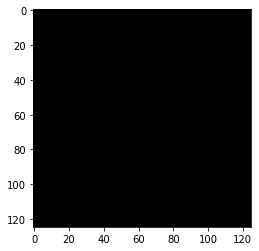

In [4]:
#for each model the first image in the 
#[cv2.imread(file) for file in glob.glob("images/"+PROFILES[i]+"/*.jpg")] 
#is just black when using cv2
images=[cv2.imread(file) for file in glob.glob("images/adrianalima/*.jpg")]
image=cv2.resize(images[0], (125,125), interpolation = cv2.INTER_AREA)
plt.imshow(image, cmap = 'gray')
plt.show()


In [ ]:
#despite us setting the max_count to be 200 posts using instaloader, some posts have multiple pictures so this makes sense
len(images)

In [5]:
    images=[]
    labels=[]
    train_images=[]
    test_images=[]
    train_labels=[]
    test_labels=[]
    for i in range (len(PROFILES)):
        temp=[cv2.imread(file) for file in glob.glob("images/"+PROFILES[i]+"/*.jpg")]
        temp=temp[1:201] #let's say we want 200 images per supermodel
        labels_temp=[PROFILES[i]]*200
        labels = labels + labels_temp
        images = images+temp


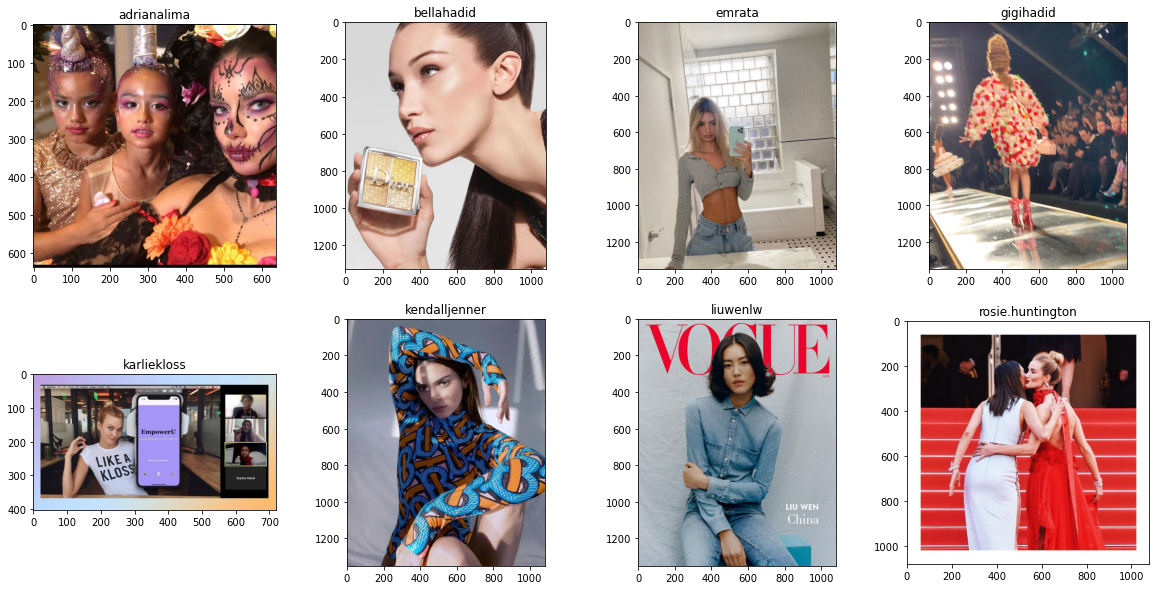

In [6]:
#change this to put each model
plt.figure(figsize=(20, 10))
index = [50,250,450,650,850,1050,1250,1450]
image_plotting = [images[index[0]],images[index[1]],images[index[2]],images[index[3]],images[index[4]],images[index[5]],images[index[6]],images[index[7]]]
labels_plotting = [labels[index[0]],labels[index[1]],labels[index[2]],labels[index[3]],labels[index[4]],labels[index[5]],labels[index[6]],labels[index[7]]]
for i in range(len(index)):
    plt.subplot(2, 4, i+1)
    plt.imshow(cv2.cvtColor(image_plotting[i], cv2.COLOR_BGR2RGB))
    plt.title(labels_plotting[i])

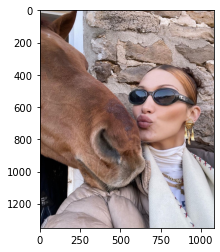

In [7]:
#original image we do BGR2RGB as opencv reads images
image = cv2.cvtColor(images[201], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


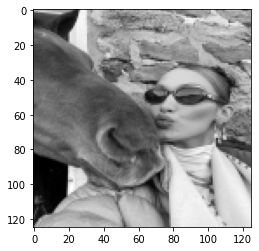

In [8]:
#properly formatted image
resized_image=cv2.resize(images[201], (125,125), interpolation = cv2.INTER_AREA)
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image, cmap = 'gray')
plt.show()

In [9]:
    randomize = list(zip(images, labels))
    random.shuffle(randomize)
    images, labels = zip(*randomize)
    # First, extract data as numpy array
    #np_df = df.to_numpy()
    num_rows = len(images)
    # you can write these two together in one line
    #num_columns = np.shape(np_df)[1]
    idx = 1120 # Get the 30th percent's index
    
    # Next, index into the first 20% of the data (rounded down), this is the validation set
    # Do the same for training set
    images_train= images[0:idx]
    images_test = images[idx:-1]# check if you need to specify end index
    
    labels_train=labels[0:idx]
    labels_test = labels[idx:-1]

In [11]:
train_length=len(images_train)
test_length=len(images_test)
total_pixels=125*125

formatted_train=[]
formatted_test=[]
for i in range(len(images_train)):
    resized_image_train=cv2.resize(images_train[i], (125,125), interpolation = cv2.INTER_AREA)
    grayscale_image_train = cv2.cvtColor(resized_image_train, cv2.COLOR_RGB2GRAY)
    formatted_train.append(grayscale_image_train)
for i in range(len(images_test)):
    resized_image_test=cv2.resize(images_test[i], (125,125), interpolation = cv2.INTER_AREA)
    grayscale_image_test = cv2.cvtColor(resized_image_test, cv2.COLOR_RGB2GRAY)
    formatted_test.append(grayscale_image_test)
pictures=formatted_train
formatted_train=np.asarray(formatted_train).reshape(total_pixels,train_length)
formatted_test=np.asarray(formatted_test).reshape(total_pixels,test_length)
formatted_train = np.asarray(formatted_train).transpose()
formatted_test = np.asarray(formatted_test).transpose()
      



In [12]:
#STEP2: Normalize the face vectors by calculating the average face vector and subtracting it from each vector

covariance_matrix = np.cov(formatted_train.T)
# covariance_matrix = np.transpose(normalized_face_vector).dot(normalized_face_vector)




In [13]:
formatted_train.shape

(1120, 15625)

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [15]:
len(eigenvectors)

15625

In [ ]:
# Create  (eigenvalue, eigenvector) tuple
# eigenvectors[:,i] implies we are selecting a column, not row
eigen_pair = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the pairs according to decreasing eigenvalues
eigen_pair.sort(key=lambda x: x[0], reverse=True)
print(eigen_pair)

/Users/nehachintamaneni/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


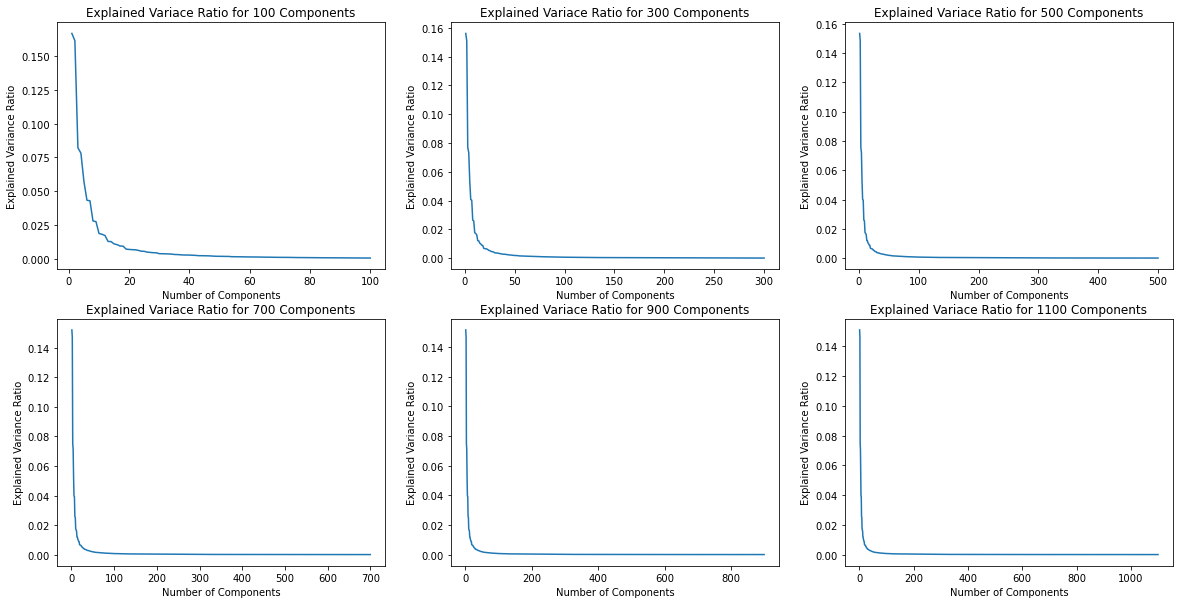

In [16]:
#print(eigenvectors.shape)
components_options = [100,300,500,700,900,1100]
components_list=[]
explained_variance_ratio_list=[]
for element in components_options:
    components=range(1, element+1)
    components_list.append(components)
    n_eigen_values = eigenvalues[0:element]
    n_eigen_vectors = eigenvectors[0:element, :]
    explained_variance_ratio=[]
    total=0
    for i in range(element):
        total+=n_eigen_values[i]
    for i in range(element):
        explained_variance_ratio.append((n_eigen_values[i])/total)
    explained_variance_ratio_list.append(explained_variance_ratio)
plt.figure(figsize=(20, 10))
for i in range(len(components_options)):
    plt.subplot(2, 3, i+1)
    plt.plot(components_list[i],explained_variance_ratio_list[i])
    plt.xlabel("Number of Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained Variace Ratio for "+str(components_options[i])+" Components")
plt.show()


In [32]:
variance_percent=0.95
total_variation=0
for i in range(len(eigenvalues)):
        total_variation+=eigenvalues[i]
needed_variance = variance_percent * total_variation

needed_components = 0
compare_variance = 0
for i in range(len(eigenvalues)):
    compare_variance += eigenvalues[i]
    if needed_variance<=compare_variance:
        needed_components = i + 1
        break

print("Number of Components needed for 95% variance capture: "+str(needed_components))

Number of Components needed for 95% variance capture: 203


In [33]:
needed_components_matrix = np.empty(shape=(formatted_train.shape[1], needed_components))
for i in range(needed_components):
    needed_components_matrix[:, i] = eigenvectors[i]
needed_components_matrix.shape

<ipython-input-33-8ac22b195415>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  needed_components_matrix[:, i] = eigenvectors[i]


(15625, 203)

In [34]:
components_matrix=needed_components_matrix.reshape(125,125,needed_components)

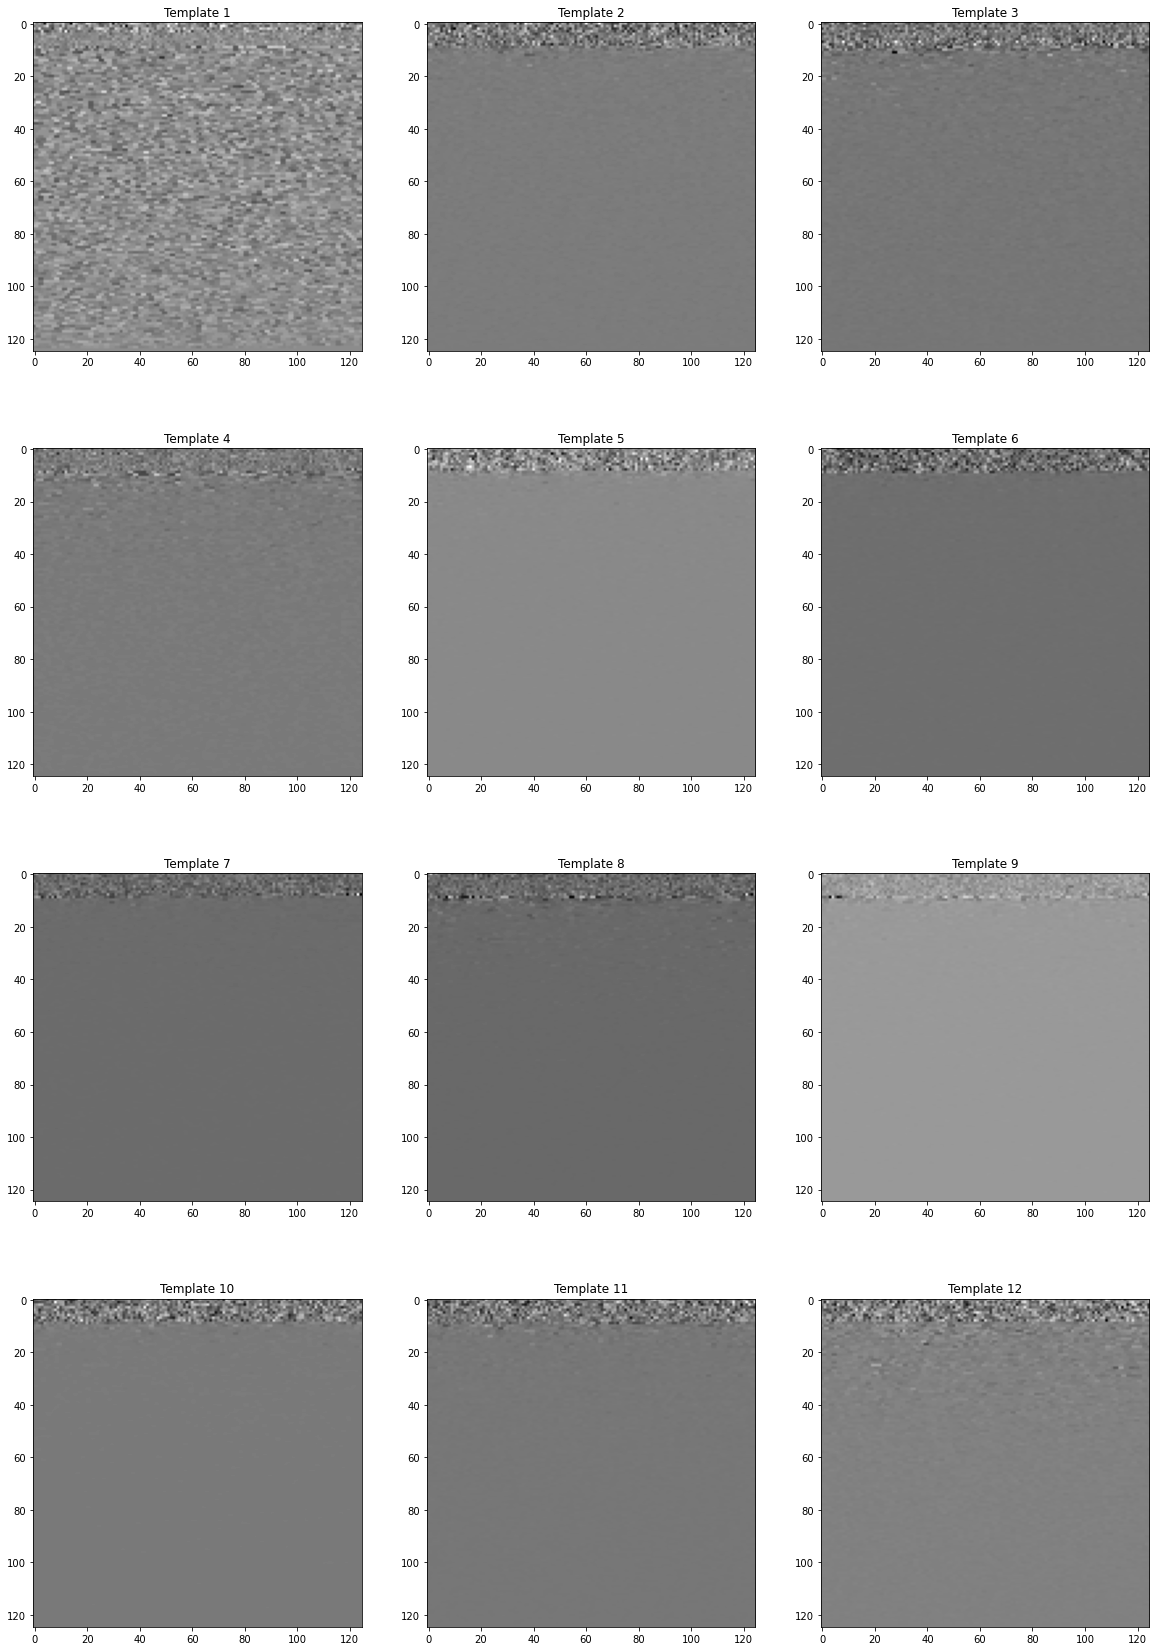

In [44]:
plt.figure(figsize=(20, 30))

for i in range(0,12):
    plt.subplot(4, 3, i+1)
    plt.imshow(components_matrix[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

In [35]:
projected_data = formatted_train.dot(needed_components_matrix) 

In [36]:
print(projected_data.shape)

(1120, 203)


Label karliekloss


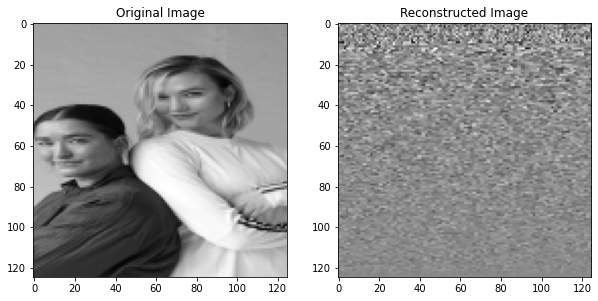

In [46]:
import random

# index of the image to reconstruct
index = 5

projected_image= np.expand_dims(projected_data[index], 0)  # (1, num_dims)

# Matrix multiply projected_image(1, num_dims) with projection_matrix transposed(num_dims, 784)
reconstructed_image = projected_image.dot(needed_components_matrix.T)  # (1, 784)
reconstructed_image = reconstructed_image.reshape(125,125)

print('Label {}'.format(labels_train[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(pictures[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')

In [90]:
    images=[]
    labels=[]
    train_images=[]
    test_images=[]
    train_labels=[]
    test_labels=[]
    for i in range (len(PROFILES)):
        temp=[cv2.imread(file) for file in glob.glob("images2/"+PROFILES[i]+"/*.jpg")]
        temp=temp[1:11] #let's say we want 200 images per supermodel
        labels_temp=[PROFILES[i]]*10
        labels = labels + labels_temp
        images = images+temp


In [84]:
len(images)

72

In [92]:
    randomize = list(zip(images, labels))
    random.shuffle(randomize)
    images, labels = zip(*randomize)
    # First, extract data as numpy array
    #np_df = df.to_numpy()
    num_rows = len(images)
    # you can write these two together in one line
    #num_columns = np.shape(np_df)[1]
    idx = 50 # Get the 70th percent's index
    
    # Next, index into the first 20% of the data (rounded down), this is the validation set
    # Do the same for training set
    images_train= images[0:idx]
    images_test = images[idx:-1]# check if you need to specify end index
    
    labels_train=labels[0:idx]
    labels_test = labels[idx:-1]

In [93]:
train_length=len(images_train)
test_length=len(images_test)
total_pixels=100*100

formatted_train=[]
formatted_test=[]
for i in range(len(images_train)):
    resized_image_train=cv2.resize(images_train[i], (100,100), interpolation = cv2.INTER_AREA)
    grayscale_image_train = cv2.cvtColor(resized_image_train, cv2.COLOR_RGB2GRAY)
    formatted_train.append(grayscale_image_train)
for i in range(len(images_test)):
    resized_image_test=cv2.resize(images_test[i], (100,100), interpolation = cv2.INTER_AREA)
    grayscale_image_test = cv2.cvtColor(resized_image_test, cv2.COLOR_RGB2GRAY)
    formatted_test.append(grayscale_image_test)
pictures=formatted_train
formatted_train=np.asarray(formatted_train).reshape(total_pixels,train_length)
formatted_test=np.asarray(formatted_test).reshape(total_pixels,test_length)
formatted_train = np.asarray(formatted_train).transpose()
formatted_test = np.asarray(formatted_test).transpose()
    

In [94]:
covariance_matrix = np.cov(formatted_train.T)

In [95]:
formatted_train.shape

(50, 10000)

In [96]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [56]:
variance_percent=0.99
total_variation=0
for i in range(len(eigenvalues)):
        total_variation+=eigenvalues[i]
needed_variance = variance_percent * total_variation

needed_components = 0
compare_variance = 0
for i in range(len(eigenvalues)):
    compare_variance += eigenvalues[i]
    if needed_variance<=compare_variance:
        needed_components = i + 1
        break

print("Number of Components needed for 99% variance capture: "+str(needed_components))

Number of Components needed for 99% variance capture: 5


In [97]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=needed_components, whiten=True)
pca.fit(formatted_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

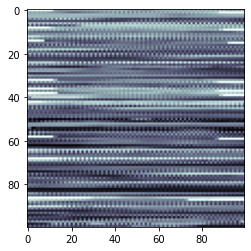

In [103]:
plt.imshow(pca.mean_.reshape(pictures[0].shape),
           cmap=plt.cm.bone)

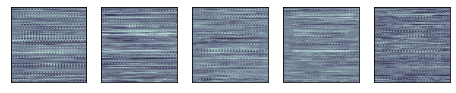

In [106]:
fig = plt.figure(figsize=(16, 5))
for i in range(5):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(pictures[0].shape),
              cmap=plt.cm.bone)

In [57]:
needed_components_matrix = np.empty(shape=(formatted_train.shape[1], needed_components))
for i in range(needed_components):
    needed_components_matrix[:, i] = eigenvectors[i]
needed_components_matrix.shape

<ipython-input-57-8ac22b195415>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  needed_components_matrix[:, i] = eigenvectors[i]


(10000, 5)

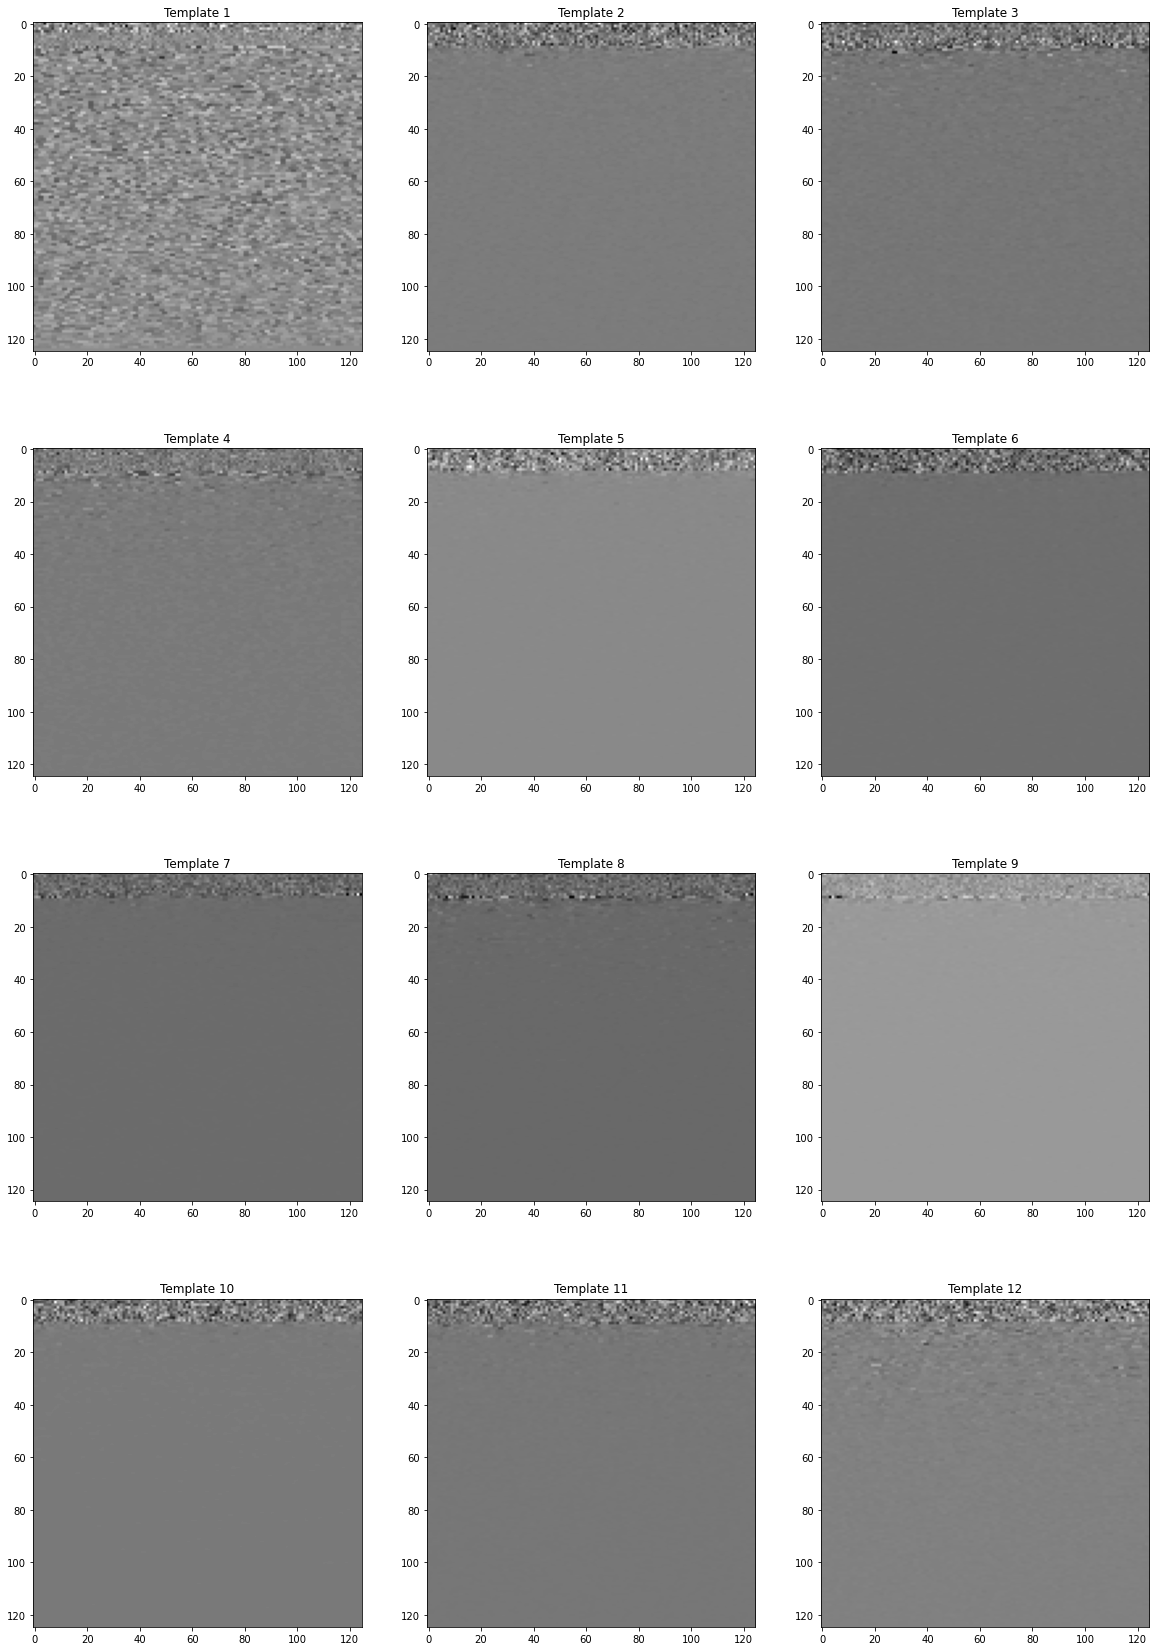

In [61]:
plt.figure(figsize=(20, 30))

for i in range(0,12):
    plt.subplot(4, 3, i+1)
    plt.imshow(components_matrix[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

In [59]:
projected_data = formatted_train.dot(needed_components_matrix) 